In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv('churn.csv')
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns=list(df.dtypes[df.dtypes=='object'].index)
for i in categorical_columns:
    df[i] = df[i].str.lower().str.replace(' ','_')
df.totalcharges=pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges=df.totalcharges.fillna(0)
df.churn=(df.churn == 'yes').astype(int)

In [14]:
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=1)

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

y_train=df_train.churn.values
y_val=df_val.churn.values
y_test=df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

numerical=['tenure', 'monthlycharges', 'totalcharges']
categorias=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

dv=DictVectorizer(sparse=False)
train_dicts=df_train[numerical + categorias].to_dict(orient='records')
X_train= dv.fit_transform(train_dicts)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

dicts_val = df_val[categorias+numerical].to_dict(orient='records')
X_val=dv.fit_transform(dicts_val)

y_pred=model.predict_proba(X_val)[:,1]
((y_pred >= 0.52).astype(int)==y_val).astype(int).mean()

np.float64(0.8055358410220014)

In [25]:
scores=[]
for j in np.linspace(0,1,21):
    decision=(y_pred >= j)
    score= (y_val == decision).mean()
    scores.append(score)

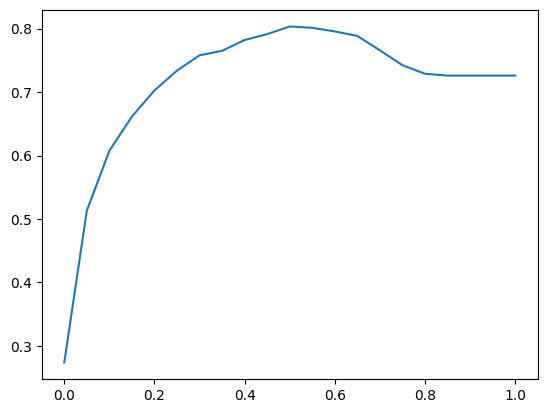

In [26]:
plt.plot(np.linspace(0,1,21), scores)

In [21]:
from sklearn.metrics import accuracy_score

In [27]:
scores=[]
for j in np.linspace(0,1,21):
    score=accuracy_score(y_val, y_pred >= j)
    scores.append(score)

In [24]:
from collections import Counter

Nuestro modelo es 80% pero si considero descartar todos es decir j=1.0, tengo que el modelo le pega al 73%, es decir que nuestro modelo arregla un 7% de lo que es el "modelo estupido", esto muestra un desbalance entre los datos ya que casi 3:1 son falsos